#  Digit Recognizer on MNIST dataset.

In [1]:
import numpy as np
import tensorflow as tf
import csv
import matplotlib
import matplotlib.pyplot as plt
import pickle

In [2]:
# Saving and loading pretrained parameters.

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

### Loading data from Kaggle MNIST dataset.

In [4]:
with open("train.csv", "r") as f:
    train_orig = list(csv.reader(f, delimiter=","))

with open("test.csv", "r") as f:
    test_orig = list(csv.reader(f, delimiter=","))
    
train_orig = np.array(train_orig[1:], dtype=np.float32)
test_x_orig = np.array(test_orig[1:], dtype=np.float32)

In [5]:
train_x_orig = train_orig[:, 1:]
train_y_orig = train_orig[:, 0]

# Normalizing data.
train_x = train_x_orig / 255.0
test_x = test_x_orig / 255.0

In [6]:
print(f"Training Y shape = {train_y_orig.shape}")
print(f"Training X shape = {train_x.shape}")
print(f"Testing  X shape = {test_x.shape}")

Training Y shape = (42000,)
Training X shape = (42000, 784)
Testing  X shape = (28000, 784)


In [7]:
# Making label matrix one-hot.

train_y_1h = tf.one_hot(train_y_orig, tf.constant(10, name="C"), axis=1)
with tf.Session() as sess:
    train_y = sess.run(train_y_1h)

In [8]:
print(f"{train_y_orig[0]} = {train_y[0]}")
print(f"{train_y_orig[567]} = {train_y[567]}")
print(f"{train_y_orig[41999]} = {train_y[41999]}")

1.0 = [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
2.0 = [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
9.0 = [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


#### Here you can see some of the examples of the training set.

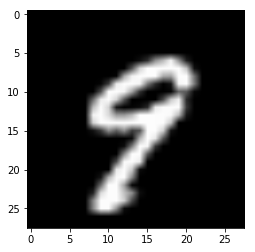

In [9]:
index = 11  # change this value to see different result
img_arr = train_x_orig[index].reshape(28, 28)
plt.imshow(img_arr, cmap=plt.cm.gray, interpolation="bilinear")

### Basic decision's about our Neural Network. 

In [10]:
(m, n_x) = train_x.shape
num_labels = 10
layers_dims = [n_x, 28, 21, 14, num_labels]
print(f"Neural Network will have {len(layers_dims)} layers, which will have {layers_dims} unit's in each of them.")

Neural Network will have 5 layers, which will have [784, 28, 21, 14, 10] unit's in each of them.


We will use He initialization, which works well with ReLU activation unit's.

In [11]:
def initialize_parameters():
    """Returns W1, b1, ... parameters of the NN."""
    
    parameters = dict()
    parameters["W1"] = tf.get_variable('W1', shape=[layers_dims[1], layers_dims[0]], initializer=tf.contrib.layers.variance_scaling_initializer())
    parameters["b1"] = tf.get_variable('b1', shape=[layers_dims[1], 1], initializer=tf.zeros_initializer())
    parameters["W2"] = tf.get_variable('W2', shape=[layers_dims[2], layers_dims[1]], initializer=tf.contrib.layers.variance_scaling_initializer())
    parameters["b2"] = tf.get_variable('b2', shape=[layers_dims[2], 1], initializer=tf.zeros_initializer())
    parameters["W3"] = tf.get_variable('W3', shape=[layers_dims[3], layers_dims[2]], initializer=tf.contrib.layers.variance_scaling_initializer())
    parameters["b3"] = tf.get_variable('b3', shape=[layers_dims[3], 1], initializer=tf.zeros_initializer())
    parameters["W4"] = tf.get_variable('W4', shape=[layers_dims[4], layers_dims[3]], initializer=tf.contrib.layers.variance_scaling_initializer())
    parameters["b4"] = tf.get_variable('b4', shape=[layers_dims[4], 1], initializer=tf.zeros_initializer())
    
    return parameters

In [12]:
tf.reset_default_graph()
sess = tf.Session()
parameters = initialize_parameters()
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print("W3 = " + str(parameters["W3"]))
print("b3 = " + str(parameters["b3"]))
print("W4 = " + str(parameters["W4"]))
print("b4 = " + str(parameters["b4"]))
sess.close()


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.
W1 = <tf.Variable 'W1:0' shape=(28, 784) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(28, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(21, 28) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(21, 1) dtype=float32_ref>
W3 = <tf.Variable 'W3:0' shape=(14, 21) dtype=float32_ref>
b3 = <tf.Variable 'b3:0' shape=(14, 1) dtype=float32_ref>
W4 = <tf.Variable 'W4:0' shape=(10, 14) dtype=float32_ref>
b4 = <tf.Variable 'b4:0' shape=(10, 1) dtype=float32_ref>


In [13]:
def forward_propagation(X, parameters):
    """Returns linear forward propagation of the last layer."""
    
    # Retrieving data from the dictionary.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    W4 = parameters["W4"]
    b4 = parameters["b4"]
    
    # Lin -> ReLU -> Lin -> ReLU -> Lin -> ReLU -> Lin
    Z1 = tf.add(tf.matmul(W1, X), b1)
    A1 = tf.nn.relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)
    A2 = tf.nn.relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)
    A3 = tf.nn.relu(Z3)
    Z4 = tf.add(tf.matmul(W4, A3), b4)
    
    return Z4

In [14]:
def find_cost(Z, Y):
    """Find cost function for future backpropagation."""
    
    logits = tf.transpose(Z)
    labels = tf.transpose(Y)
    
    cost = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits_v2(labels=labels, logits=logits))
    
    return cost

Combining all the method's into one model.

In [14]:
def model(train_X, train_Y, learning_rate=0.03, num_iterations=10_000, show_cost=False):
    tf.reset_default_graph()
    
    X = tf.placeholder(tf.float32, shape=train_X.shape, name="X")
    Y = tf.placeholder(tf.float32, shape=train_Y.shape, name="Y")
    
    parameters = initialize_parameters()
    
    Z4 = forward_propagation(X, parameters)
    
    cost = find_cost(Z4, Y)
    costs = []
    
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    init = tf.global_variables_initializer()
    
    sess = tf.Session()
    sess.run(init)
    
    # Train our parameters num_iterations times.
    for i in range(num_iterations):
        _, c = sess.run([optimizer, cost], feed_dict={X: train_X, Y: train_Y})
        if (i % 1000 == 0) and show_cost:
            print(f"Cost on {i} iteration = {c:.6f}.")
        if num_iterations % 5 and show_cost:
            costs.append(c)
    
    # Save parameters after training.
    params = sess.run(parameters)
    sess.close()
    
    return params
    

In [15]:
# If you want to train your parameters again -> run this cell.

parameters = model(train_x.T, train_y.T, show_cost=True)
save_obj(parameters, "parameters")

NameError: name 'model' is not defined

In [16]:
# Loading pretrained parameters.

parameters = load_obj("parameters")

In [50]:
def accurate(X, Y, parameters):
    """Gives accuracy for the examples of dataset"""
    
    Z4 = forward_propagation(X, parameters)
    logits = tf.nn.softmax(Z4)
    
    with tf.Session() as sess:
        accuracy = sess.run(tf.reduce_mean(tf.abs(logits - Y)))
        
    return accuracy
    
def predict(test_X, parameters):
    """Predicts label of the image."""
    
    from pandas import DataFrame
    
    X = tf.placeholder(tf.float32, shape=test_X.shape, name="X")
    
    Z4 = forward_propagation(X, parameters)
    logits = tf.nn.softmax(Z4)
    
    with tf.Session() as sess:
        labels = sess.run(logits, feed_dict={X: test_X})
    
    new_labels = []
    for l in labels.T:
        max_elem = l[0]
        max_index = 0
        for i in range(1, 10):
            if l[i] > max_elem:
                max_elem = l[i]
                max_index = i
        new_labels.append(max_index)
            
    df = DataFrame()
    df["ImageId"] = range(1, test_X.shape[1]+1)
    df["Label"] = new_labels
    return df

In [51]:
accuracy = accurate(train_x.T, train_y.T, parameters)
print(f"Accuracy of this model is {(1-accuracy)*100:.3f}%.")

Accuracy of this model is 90.002%.


## Predicting your test images.

In [52]:
test_rez = predict(test_x.T, parameters)
test_rez.head()

,ImageId,Label
0,1,2
1,2,0
2,3,0
3,4,0
4,5,1


In [53]:
test_rez.to_csv(r"answer.csv", index=None, header=True)

## Test with your own image. (not working)

In [19]:
import scipy
from PIL import Image
from scipy import ndimage

img_arr = train_x_orig[index].reshape(28, 28)

my_image = "images/7.png"
img = Image.open(my_image).convert("LA").convert('RGB')
my_image = my_image[:-4] + "_grey.jpg"
img.save(my_image)

In [20]:
fname = my_image
image = np.array(ndimage.imread(fname, flatten=False))
print(image.shape)
my_image = scipy.misc.imresize(image, size=(24,24)).reshape((1, 24*24)).T
my_image_prediction = predict(my_image, parameters)

plt.imshow(image)
print("Your algorithm predicts: y = " + str(np.squeeze(my_image_prediction)))

(1280, 1163, 3)


C:\Users\OwO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
C:\Users\OwO\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  after removing the cwd from sys.path.


ValueError: cannot reshape array of size 1728 into shape (1,576)